In [70]:
# Basic imports 
import numpy as np
import matplotlib.pyplot as plt
# Import data from keras
from keras.datasets import mnist # 28x28 images handwritten images of numbers 0-9

import tensorflow as tf

In [52]:
# Split the MNIST data into train and test sets.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [53]:
# let's print the shape before we normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
print(X_train[0])

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

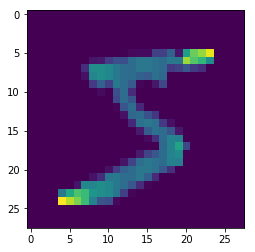

In [54]:
# Now we need to normalize the data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
print(X_train[0])
plt.imshow(X_train[0])
plt.show()

In [55]:
# Build the models(1 input and ouput layer and 2 hidden layers)
# We will use feed forward model i.e sequential model
model = tf.keras.models.Sequential()
# now we need to flatten the input layer as images are 28x28, make it a flat 1x784
model.add(tf.keras.layers.Flatten()) # For input layer
# We will now add Dense hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # For hidden layer
# Add another identical layer for good measure.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # For hidden layer



In [56]:
# After model we need configure the learning process using .compile() for training the model
# Here we specify our loss function
model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")
# We have used Adnam optimizer: https://arxiv.org/abs/1412.6980v8
# categorical_crossentropy is on one of the popular: https://keras.io/losses/

In [57]:
# training the model and saving metrics in history
history = model.fit(X_train, y_train, epochs=3)


Epoch 1/3
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2650 - acc: 0.9232
Epoch 2/3
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1080 - acc: 0.9673
Epoch 3/3
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0726 - acc: 0.9773


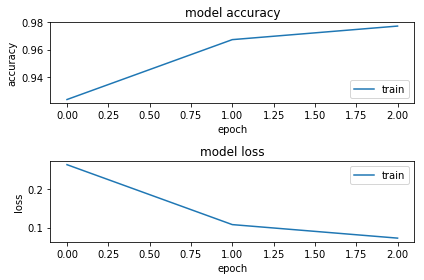

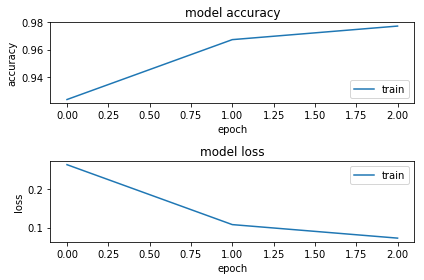

In [58]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [59]:
# Print loss and accuracy for in-sample data
val_loss, val_acc = model.evaluate(X_test, y_test)

print(val_loss)
print(val_acc)


10000/10000 [==============================] - 1s 69us/sample - loss: 0.0959 - acc: 0.9693
0.09594660463137553
0.9693


In [60]:
# Save the model
model.save("digit_recognizer.model")

In [69]:
# Load the model
digit_model = tf.keras.models.load_model("digit_recognizer.model")
# Now make predictions
prediction = digit_model.predict(X_test)



W0802 18:35:45.508159 139714189588288 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [74]:
# print prediction will not display data properly as they will be probability distribution
print(np.argmax(prediction[1]))

2


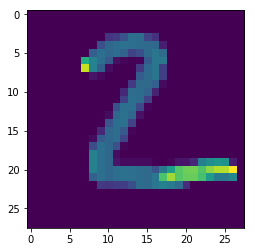

In [76]:
# Display img using matplotlib and check whether prediction was right or not
plt.imshow(X_test[1])
plt.show()